In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')
!pip install chart-studio
import chart_studio.plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [12]:
pd.set_option('display.max_columns', None)

In [15]:
pd.set_option("display.max_rows", 105)

In [17]:
#Importing the dataset
df= pd.read_csv('Loan_status_2007-2020Q3.gzip',low_memory=False)

In [19]:
#Inspecting the dataset and datatypes for different features
print("Shape of the dataset:",df.shape)
df.head()

Shape of the dataset: (2925493, 142)


,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,0,1077501,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,735.0,739.0,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-2015,171.62,NaN,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,1,1077430,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0.0,Apr-1999,740.0,744.0,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-2013,119.66,NaN,Oct-2016,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2,1077175,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,735.0,739.0,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.0,0.0,3

In [ ]:
df = df.drop(['Unnamed: 0', 'id','url','title'],axis = 1)
df.dtypes

In [21]:
# Correcting the datatypes for different features
df['term'] = df['term'].str.rstrip('months').astype('float') 
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float') 
df['issue_d']=pd.to_datetime(df['issue_d'])
df['hardship_start_date']=pd.to_datetime(df['hardship_start_date'])
df['hardship_end_date']=pd.to_datetime(df['hardship_end_date'])
df['payment_plan_start_date']=pd.to_datetime(df['payment_plan_start_date'])
df['last_pymnt_d']=pd.to_datetime(df['last_pymnt_d'])
df['next_pymnt_d']=pd.to_datetime(df['next_pymnt_d'])
df['last_credit_pull_d']=pd.to_datetime(df['last_credit_pull_d'])
df['sec_app_earliest_cr_line'] = pd.to_datetime(df['sec_app_earliest_cr_line'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])
df['revol_util'] = df['revol_util'].str.rstrip('%').astype('float') 
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])
df['zip_code'] = df['zip_code'].str.rstrip('xx').astype('int')

ValueError: cannot convert float NaN to integer

In [24]:
df.isnull().sum()/len(df)*100

Unnamed: 0                                     0.000000
id                                             0.000000
loan_amnt                                      0.000034
funded_amnt                                    0.000034
funded_amnt_inv                                0.000034
                                                ...    
hardship_loan_status                          95.097886
orig_projected_additional_accrued_interest    93.873169
hardship_payoff_balance_amount                93.776228
hardship_last_payment_amount                  93.776228
debt_settlement_flag                           0.000034
Length: 142, dtype: float64

In [483]:
# Keeping only those features with less than 5% of missing values
features_to_keep = df.columns[((df.isnull().sum()/len(df))*100 < 53)].to_list()
features_out = df.columns[((df.isnull().sum()/len(df))*100 > 35)].to_list()
print("Total features before:",len(df.columns))
print("Total features now:",len(features_to_keep))

Total features before: 138
Total features now: 104


In [484]:
df=df[features_to_keep]
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'hardship_flag', 'debt_settlement_flag'],
      dtype='object', length=104)

In [485]:
categorical_col = df.select_dtypes(include='object').columns.to_list()
numeric_col = df.select_dtypes(include='number').columns.to_list()
date_col = df.select_dtypes(include='datetime').columns.to_list()

In [486]:
df= df.dropna()

In [487]:
df.shape

(658716, 104)

In [488]:
df['loan_status'].value_counts()

loan_status
Current               297387
Fully Paid            281115
Charged Off            73303
Late (31-120 days)      3474
In Grace Period         2495
Late (16-30 days)        654
Issued                   156
Default                  132
Name: count, dtype: int64

In [489]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Issued'],
      dtype=object)

In [490]:
df['year'] = df['issue_d'].dt.year
df['ec_year'] = df['earliest_cr_line'].dt.year

Text(0, 0.5, 'Average loan amount issued')

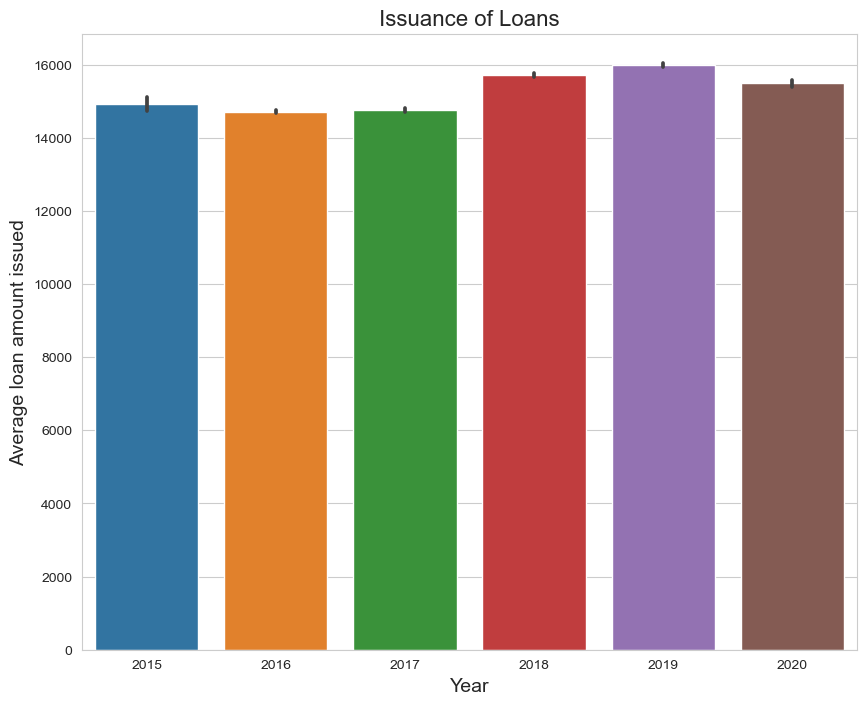

In [491]:
plt.figure(figsize=(10,8))
sns.barplot(x='year',y= 'loan_amnt', data=df, palette='tab10')
plt.title('Issuance of Loans', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average loan amount issued', fontsize=14)

In [492]:
bad_loan = ["Charged Off", "Default", 'In Grace Period','Late (31-120 days)', 'Late (16-30 days)']

df['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan' 
    
df['loan_condition'] = df['loan_status'].apply(loan_condition)

([<matplotlib.patches.Wedge at 0x20ec024f1d0>,
 [Text(-0.7342807700200774, -0.8190431922546713, 'Good Loans'),
  Text(0.9011627396783031, 1.0051893934057876, 'Bad Loans')],
 [Text(-0.4005167836473149, -0.44675083213891154, '87.8%'),
  Text(0.5673987620196723, 0.6328970254777181, '12.2%')])

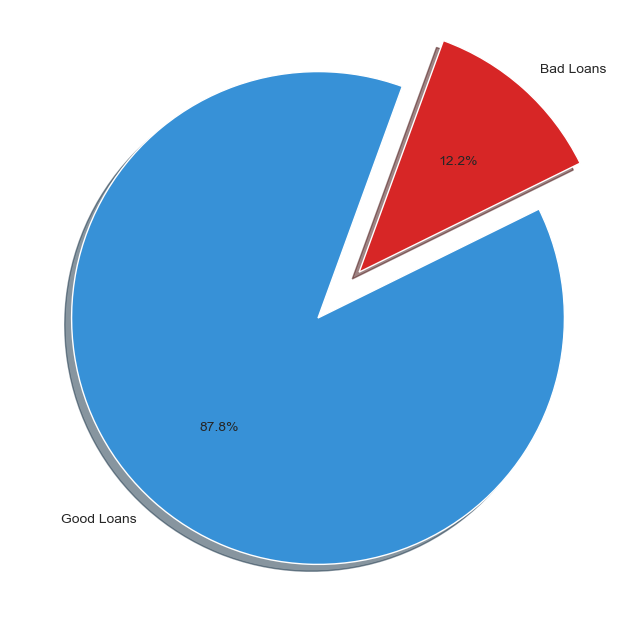

In [493]:
fig, ax = plt.subplots(figsize=(16,8))
colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"
ax.pie(df["loan_condition"].value_counts(), autopct='%1.1f%%',explode=[0,0.25],shadow=True, colors=colors, 
                                             labels=labels, startangle=70)

<Axes: xlabel='year', ylabel='loan_amnt'>

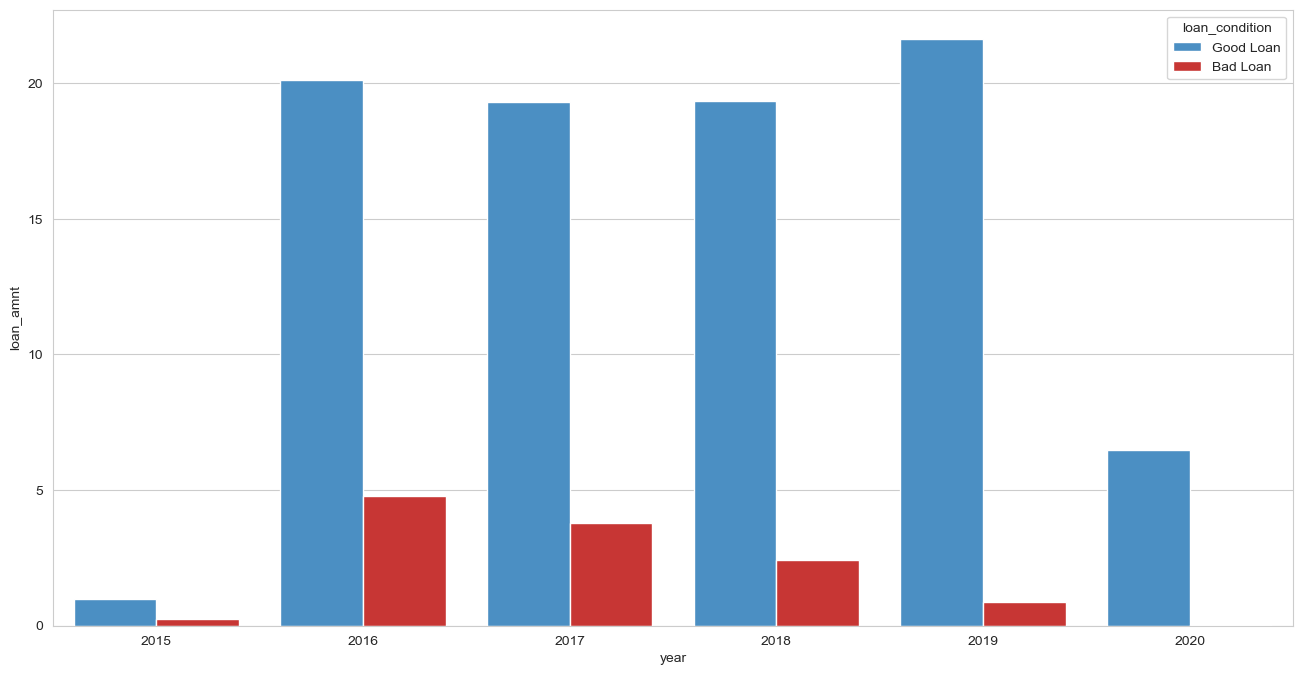

In [494]:
fig, ax = plt.subplots(figsize=(16,8))
palette = ["#3791D7", "#E01E1B"]
sns.barplot(x="year", y="loan_amnt", hue="loan_condition", data=df, palette=palette, estimator=lambda x: len(x) / len(df) * 100)

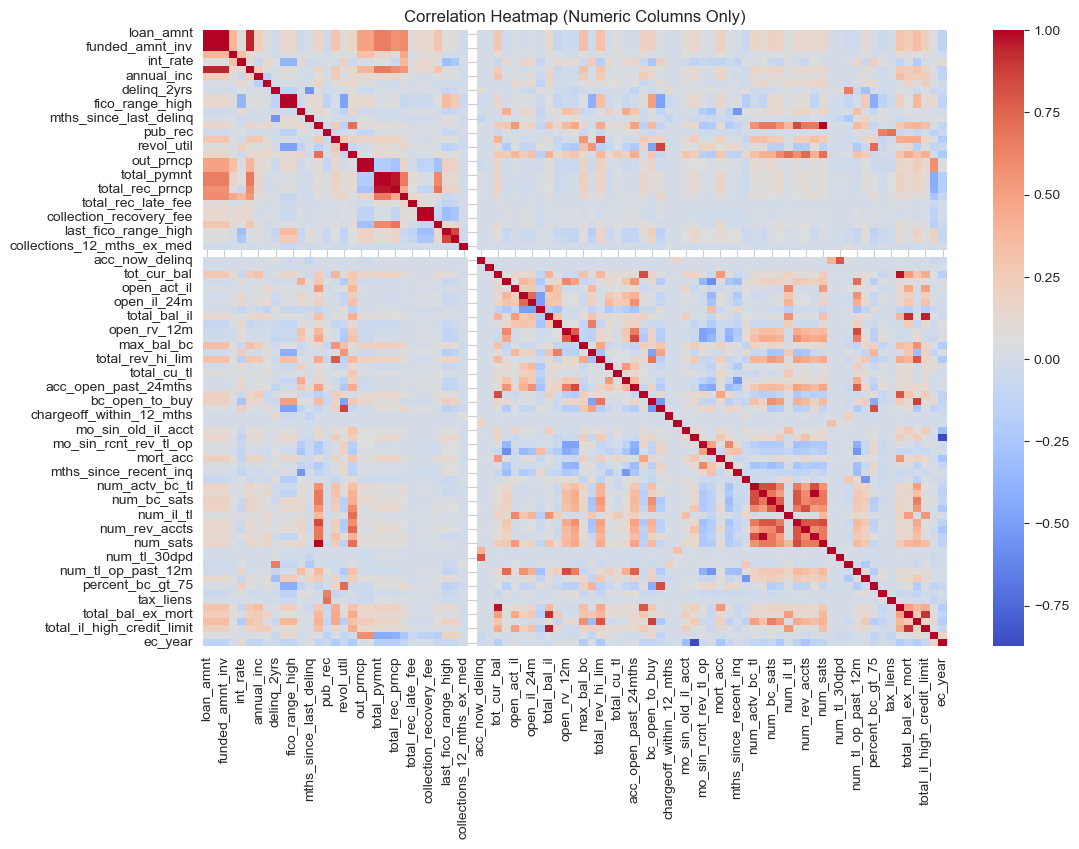

In [495]:
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

In [496]:
df = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]

In [497]:
df['addr_state'].unique()

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']

df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'

df['region'] = df['addr_state'].apply(finding_regions)

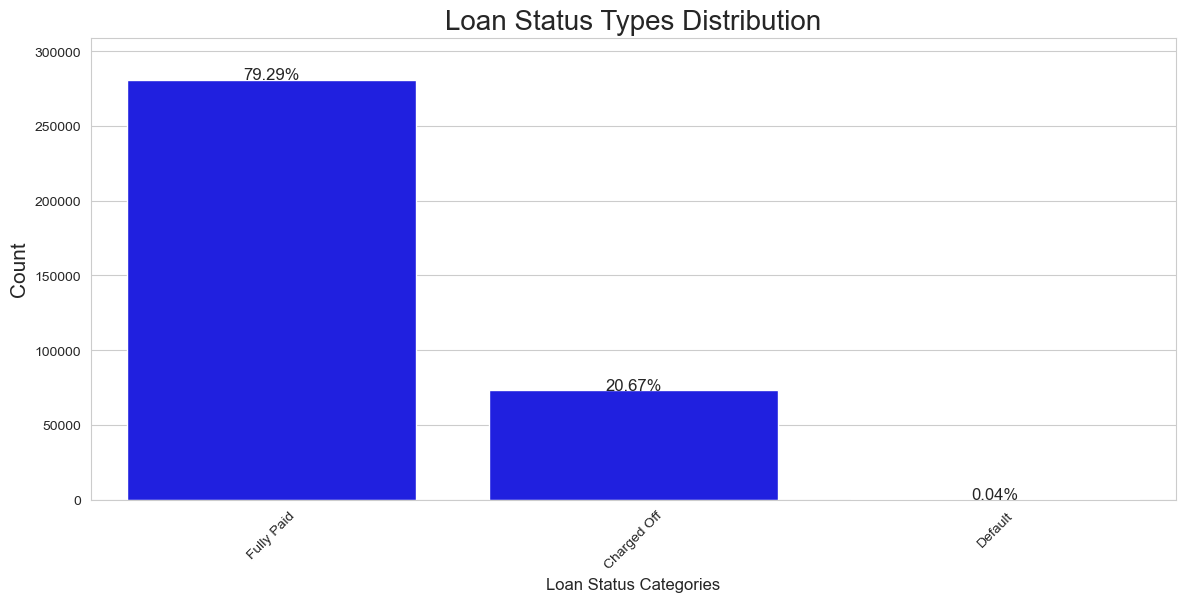

In [498]:
total = len(df)

plt.figure(figsize = (14,6))

g = sns.countplot(x="loan_status", data=df, color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

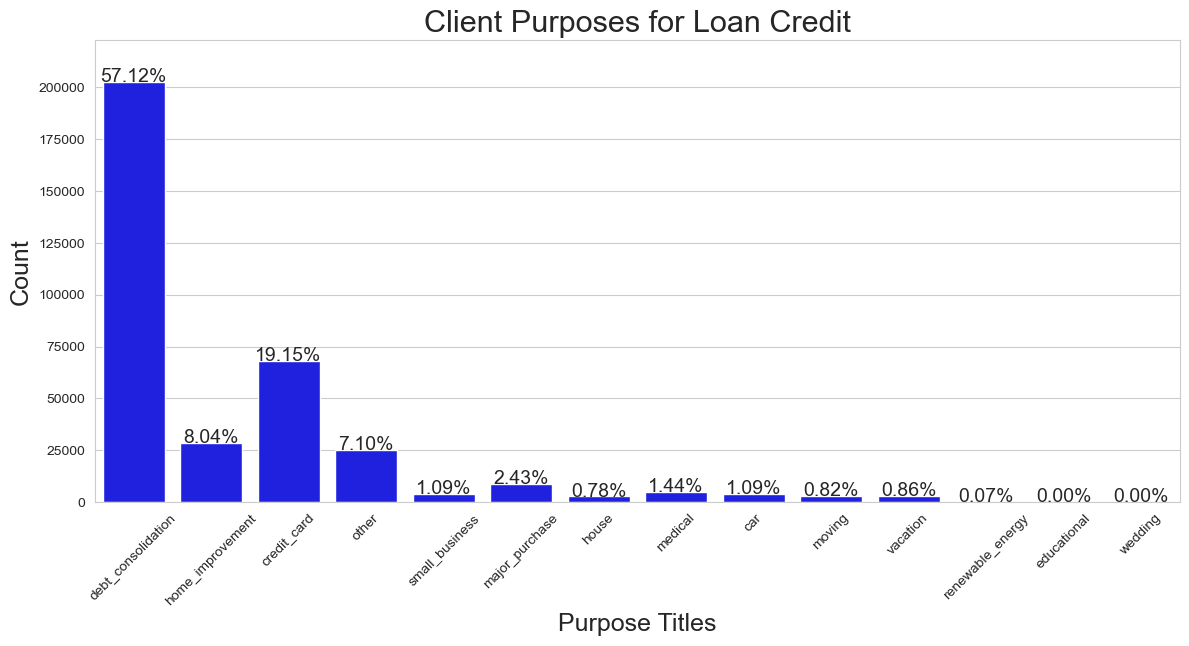

In [499]:
plt.figure(figsize=(14,6))

g = sns.countplot(x='purpose', data=df, 
                  color='blue')
g.set_title("Client Purposes for Loan Credit", fontsize=22)
g.set_xlabel("Purpose Titles", fontsize=18)
g.set_ylabel('Count', fontsize=18)

sizes=[]

for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
    
g.set_ylim(0, max(sizes) * 1.10)
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

plt.show()


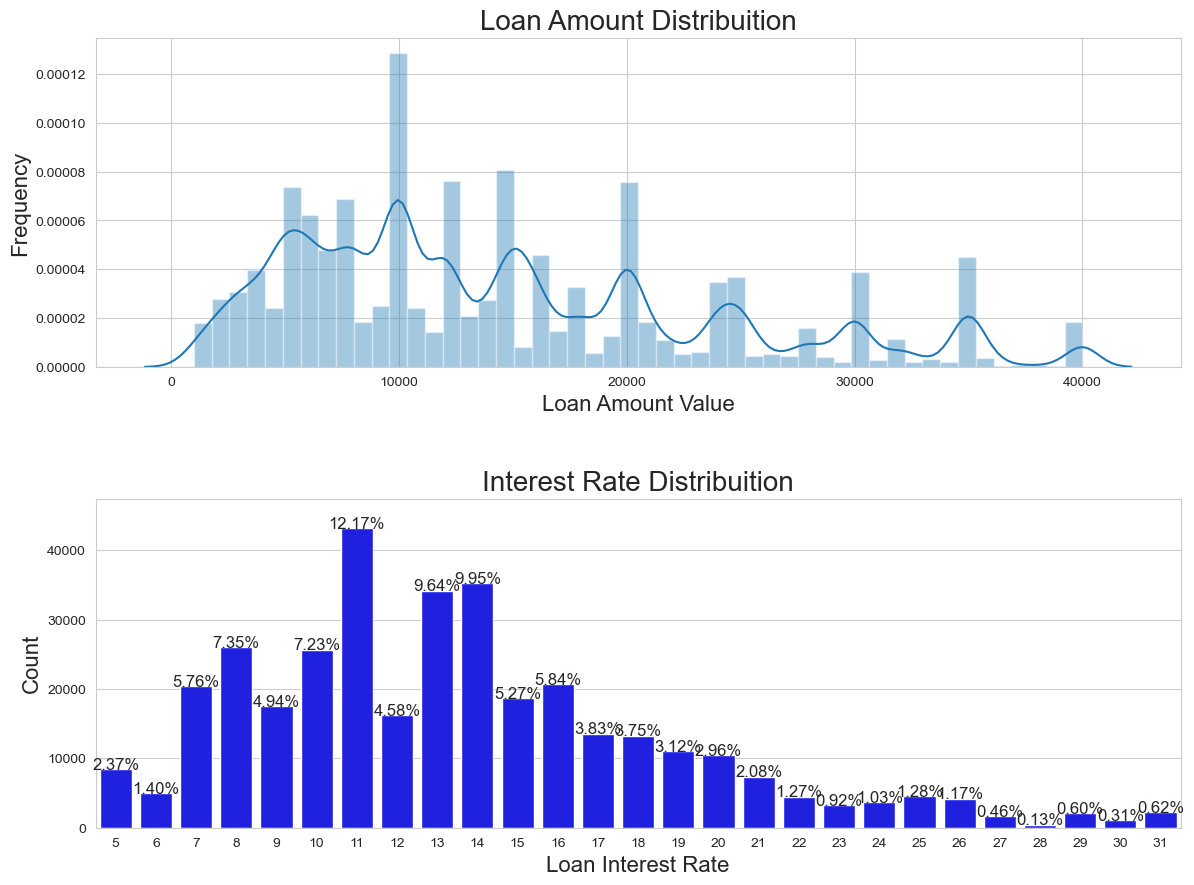

In [500]:

df['int_round'] = df['int_rate'].round(0).astype(int)

#I will start looking the loan_amnt column
plt.figure(figsize=(14,10))

# Loan Amt plot
plt.subplot(211)
g = sns.distplot(df["loan_amnt"])
g.set_xlabel("Loan Amount Value", fontsize=16)
g.set_ylabel("Frequency", fontsize=16)
g.set_title("Loan Amount Distribuition", fontsize=20)

## Interest plot
plt.subplot(212)
g1 = sns.countplot(x="int_round", data=df, 
                  color='blue')
g1.set_xlabel("Loan Interest Rate", fontsize=16)
g1.set_ylabel("Count", fontsize=16)
g1.set_title("Interest Rate Distribuition", fontsize=20)
sizes=[] # Get highest values in y
for p in g1.patches:
    height = p.get_height()
    sizes.append(height)
    g1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g1.set_ylim(0, max(sizes) * 1.10) # set y limit based on highest heights

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

In [501]:
#Exploring the loan_status x purpose
purp_loan= ['purpose', 'loan_status']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[purp_loan[0]], df[purp_loan[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

loan_status,Charged Off,Default,Fully Paid
purpose,,,
car,0.770000,0.000000,1.180000
credit_card,16.680000,12.880000,19.800000
debt_consolidation,60.230000,66.670000,56.300000
educational,0.000000,0.000000,0.000000
home_improvement,7.140000,6.060000,8.280000
house,0.940000,3.030000,0.740000
major_purchase,2.410000,0.760000,2.440000
medical,1.440000,3.030000,1.440000
moving,0.960000,0.000000,0.790000


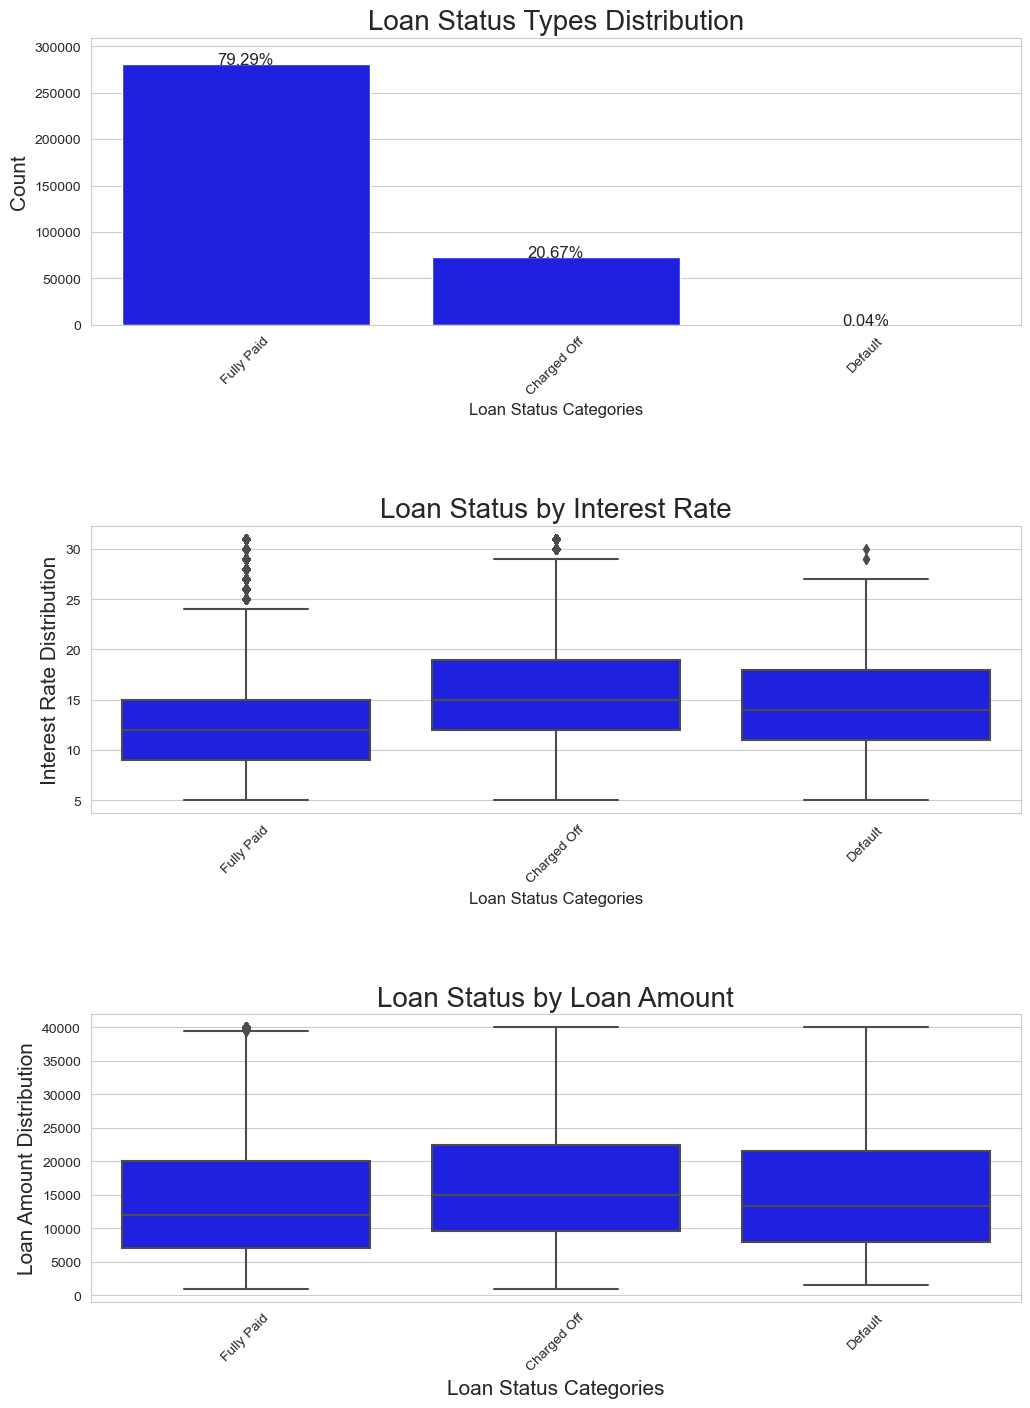

In [502]:
plt.figure(figsize = (12,16))

plt.subplot(311)
g = sns.countplot(x="loan_status", data=df, 
                  color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status Categories", fontsize=12)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=12) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(312)
g1 = sns.boxplot(x="loan_status", y="int_round", data=df, 
                 color='blue')
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Status Categories", fontsize=12)
g1.set_ylabel("Interest Rate Distribution", fontsize=15)
g1.set_title("Loan Status by Interest Rate", fontsize=20)

plt.subplot(313)
g2 = sns.boxplot(x="loan_status", y="loan_amnt", data=df, 
                 color='blue')
g2.set_xticklabels(g2.get_xticklabels(),rotation=45)
g2.set_xlabel("Loan Status Categories", fontsize=15)
g2.set_ylabel("Loan Amount Distribution", fontsize=15)
g2.set_title("Loan Status by Loan Amount", fontsize=20)

plt.subplots_adjust(hspace = 0.7,top = 0.9)

plt.show()

In [503]:
#Looking the 'verification_status' column that is the Indicates 
#if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified
loan_verification = ['loan_status', 'verification_status']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[loan_verification[0]], df[loan_verification[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

verification_status,Not Verified,Source Verified,Verified
loan_status,,,
Charged Off,16.360000,21.000000,25.650000
Default,0.030000,0.040000,0.030000
Fully Paid,83.600000,78.960000,74.320000


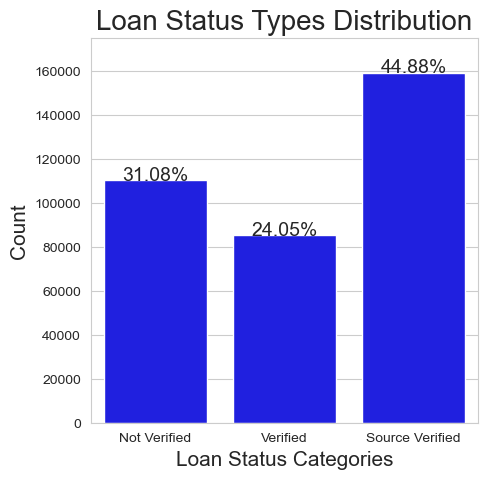

In [504]:

plt.figure(figsize = (5,5))

g = sns.countplot(x="verification_status", data=df, 
                  color='blue')
g.set_xlabel("Loan Status Categories", fontsize=15)
g.set_ylabel("Count", fontsize=15)
g.set_title("Loan Status Types Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.show()

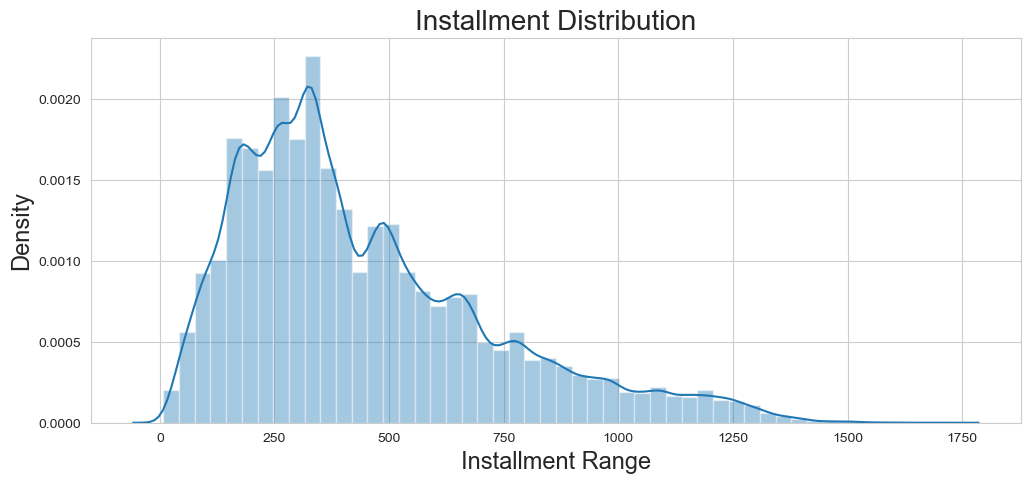

In [505]:
plt.figure(figsize=(12,5))

sns.distplot(df['installment'])
plt.title("Installment Distribution", fontsize=20)
plt.xlabel("Installment Range", fontsize=17)
plt.ylabel("Density", fontsize=17)

plt.show()

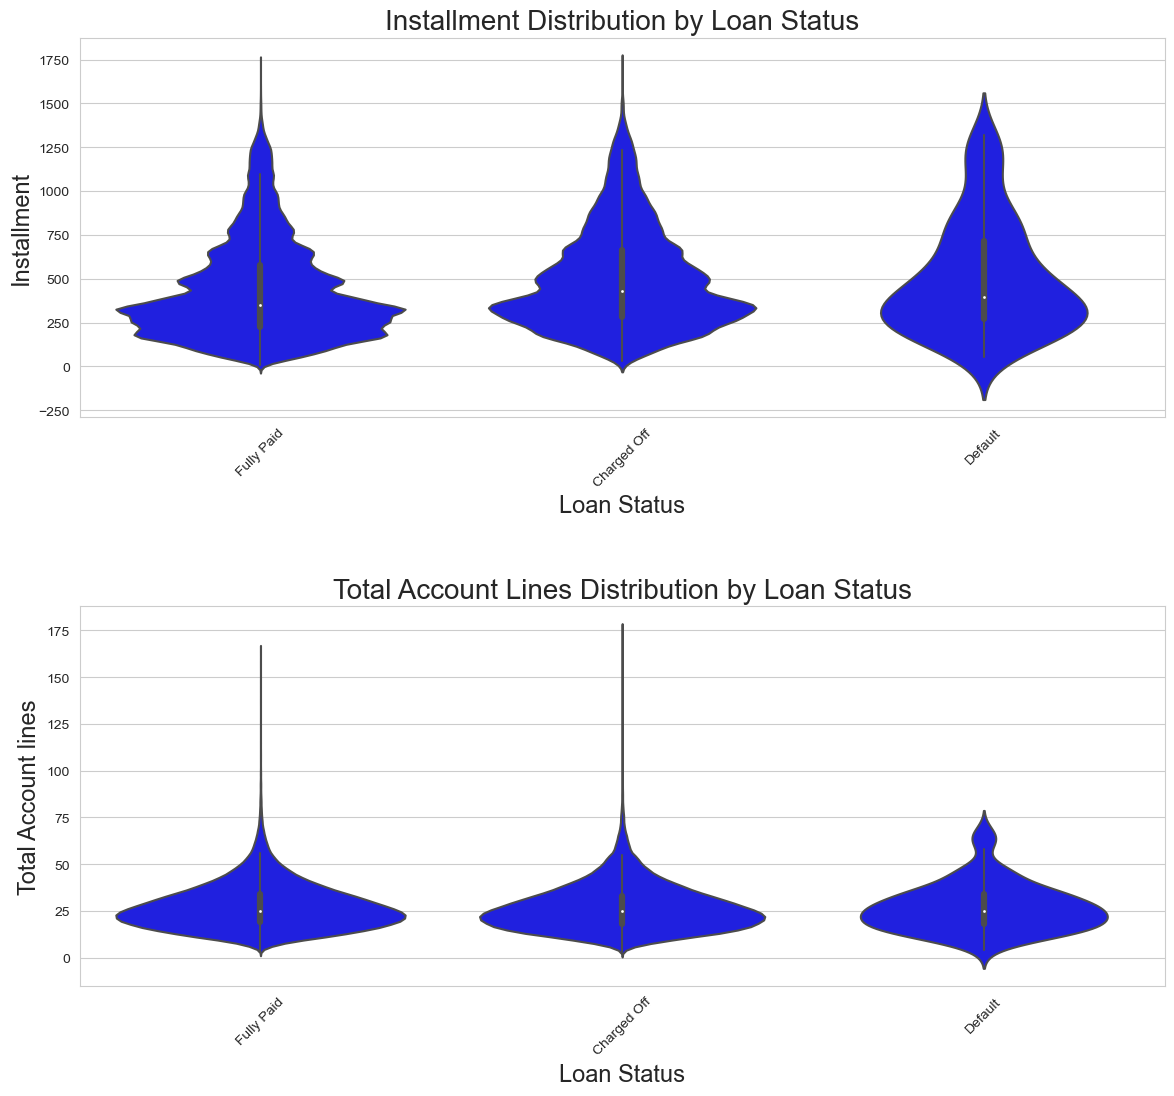

In [506]:

plt.figure(figsize = (14,12))

plt.subplot(211)
g = sns.violinplot(x='loan_status', y="installment",
                   data=df, color='blue')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Loan Status", fontsize=17)
g.set_ylabel("Installment", fontsize=17)
g.set_title("Installment Distribution by Loan Status", fontsize=20)

plt.subplot(212)
g1 = sns.violinplot(x='loan_status', y="total_acc",
                   data=df, color='blue')
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_xlabel("Loan Status", fontsize=17)
g1.set_ylabel("Total Account lines", fontsize=17)
g1.set_title("Total Account Lines Distribution by Loan Status", fontsize=20)

plt.subplots_adjust(hspace = 0.5,top = 0.9)

plt.show()

In [507]:
#Exploring the loan_status x Application_type
loan_application = ['loan_status', 'application_type']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df[loan_application[0]], df[loan_application[1]],normalize='columns')*100,2).style.background_gradient(cmap = cm)

application_type,Individual,Joint App
loan_status,,
Charged Off,20.400000,25.000000
Default,0.040000,0.050000
Fully Paid,79.560000,74.960000


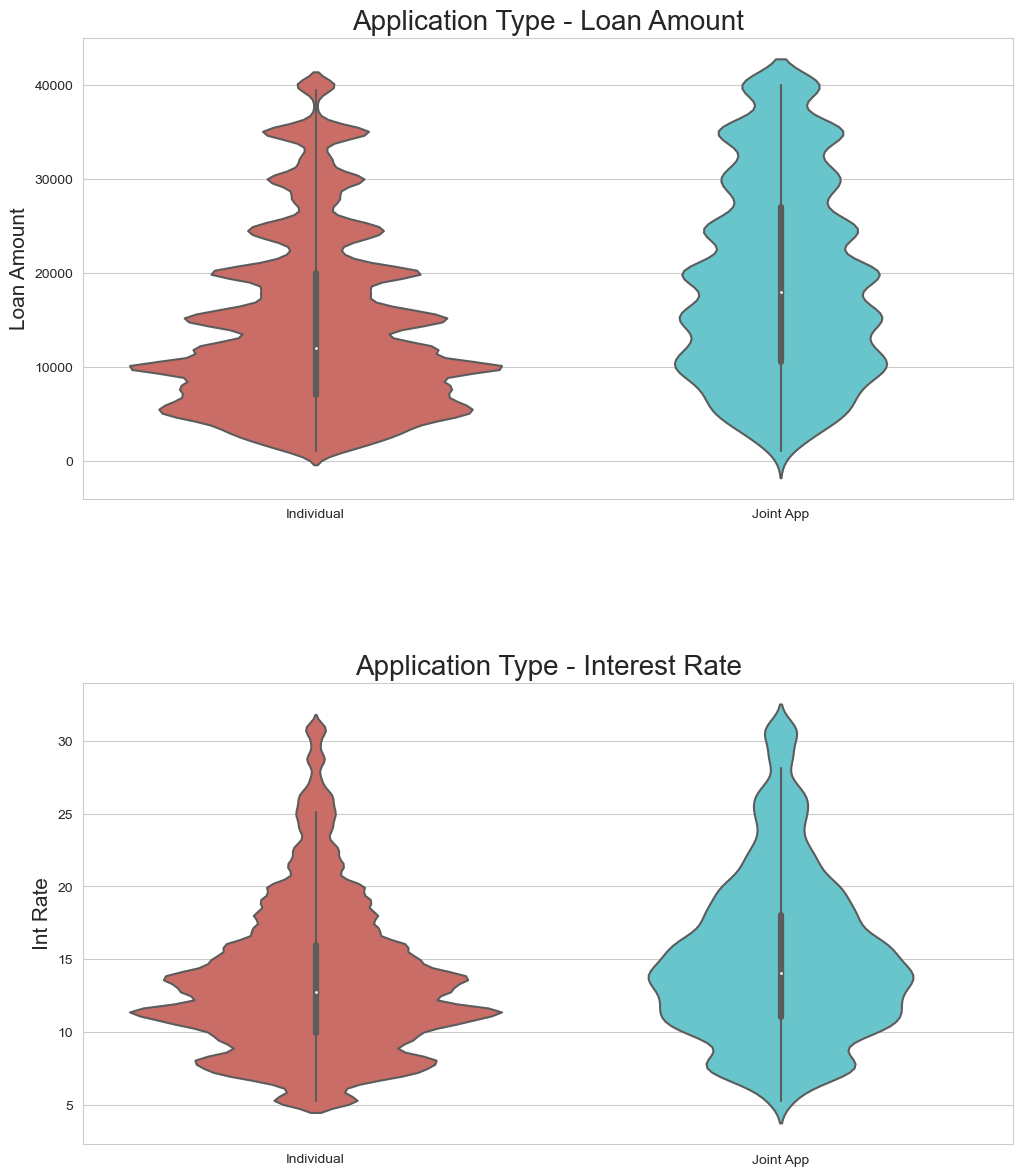

In [508]:
plt.figure(figsize = (12,14))
#The amount and int rate x application_type 
plt.subplot(211)
g = sns.violinplot(x="application_type", y="loan_amnt",data=df, 
            palette="hls")
g.set_title("Application Type - Loan Amount", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="application_type", y="int_rate",data=df,
               palette="hls")
g1.set_title("Application Type - Interest Rate", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Int Rate", fontsize=15)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)

plt.show()

In [509]:
loan_home = ['loan_status', 'home_ownership']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df[loan_home[0]], df[loan_home[1]], 
            normalize='index')*100,2).fillna(0).style.background_gradient(cmap = cm)

home_ownership,ANY,MORTGAGE,NONE,OWN,RENT
loan_status,,,,,
Charged Off,0.100000,46.010000,0.000000,11.210000,42.680000
Default,0.000000,48.480000,0.000000,14.390000,37.120000
Fully Paid,0.100000,54.460000,0.000000,11.130000,34.310000


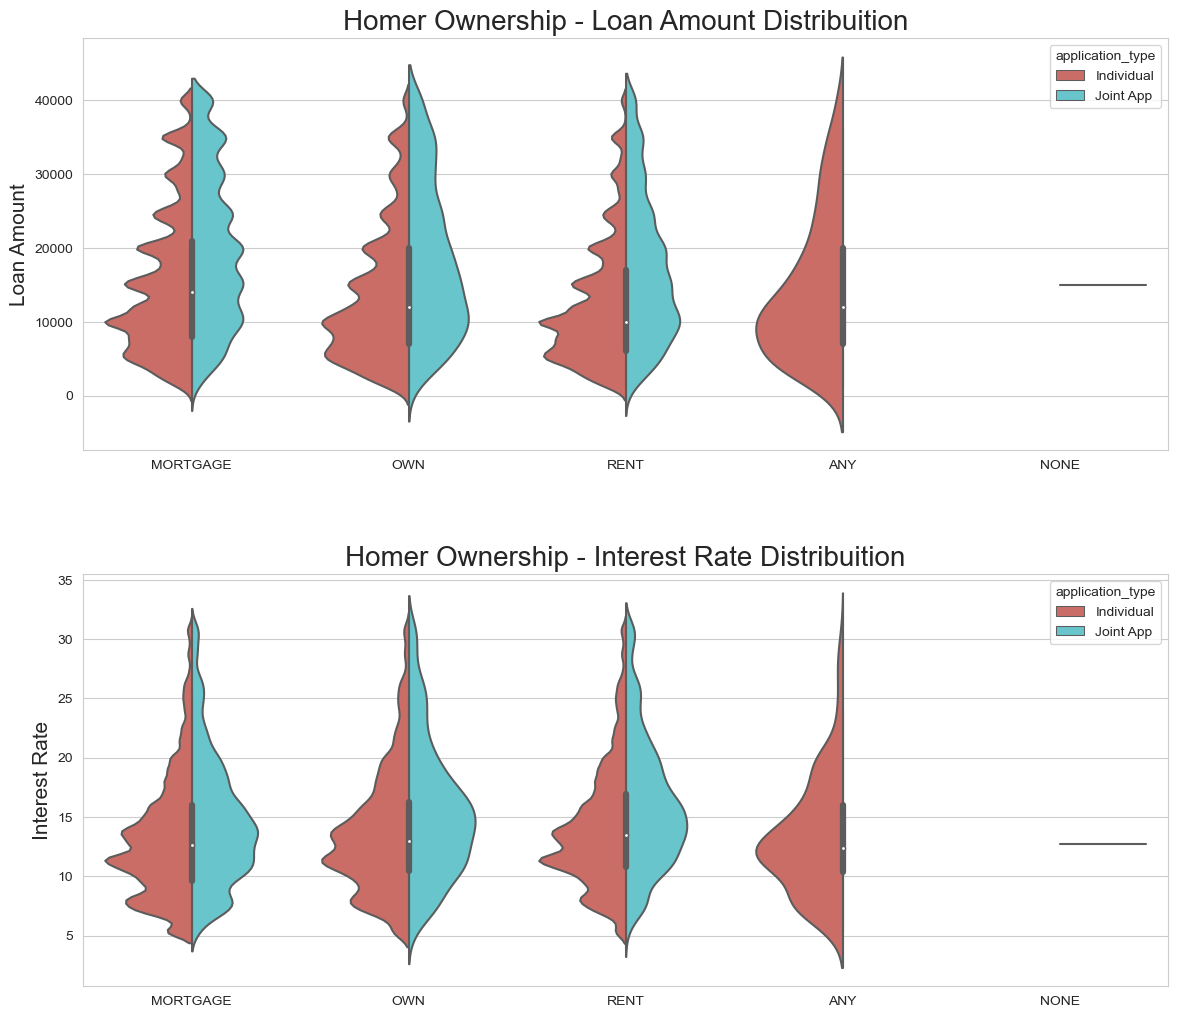

In [510]:
plt.figure(figsize = (14,12))

plt.subplot(211)
g = sns.violinplot(x="home_ownership",y="loan_amnt",data=df,
               kind="violin",
               split=True,palette="hls",
               hue="application_type")
g.set_title("Homer Ownership - Loan Amount Distribuition", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Loan Amount", fontsize=15)

plt.subplot(212)
g1 = sns.violinplot(x="home_ownership",y="int_rate",data=df,
               kind="violin",
               split=True,palette="hls",
               hue="application_type")
g1.set_title("Homer Ownership - Interest Rate Distribuition", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Interest Rate", fontsize=15)

plt.subplots_adjust(hspace = 0.3,top = 0.9)

plt.show()

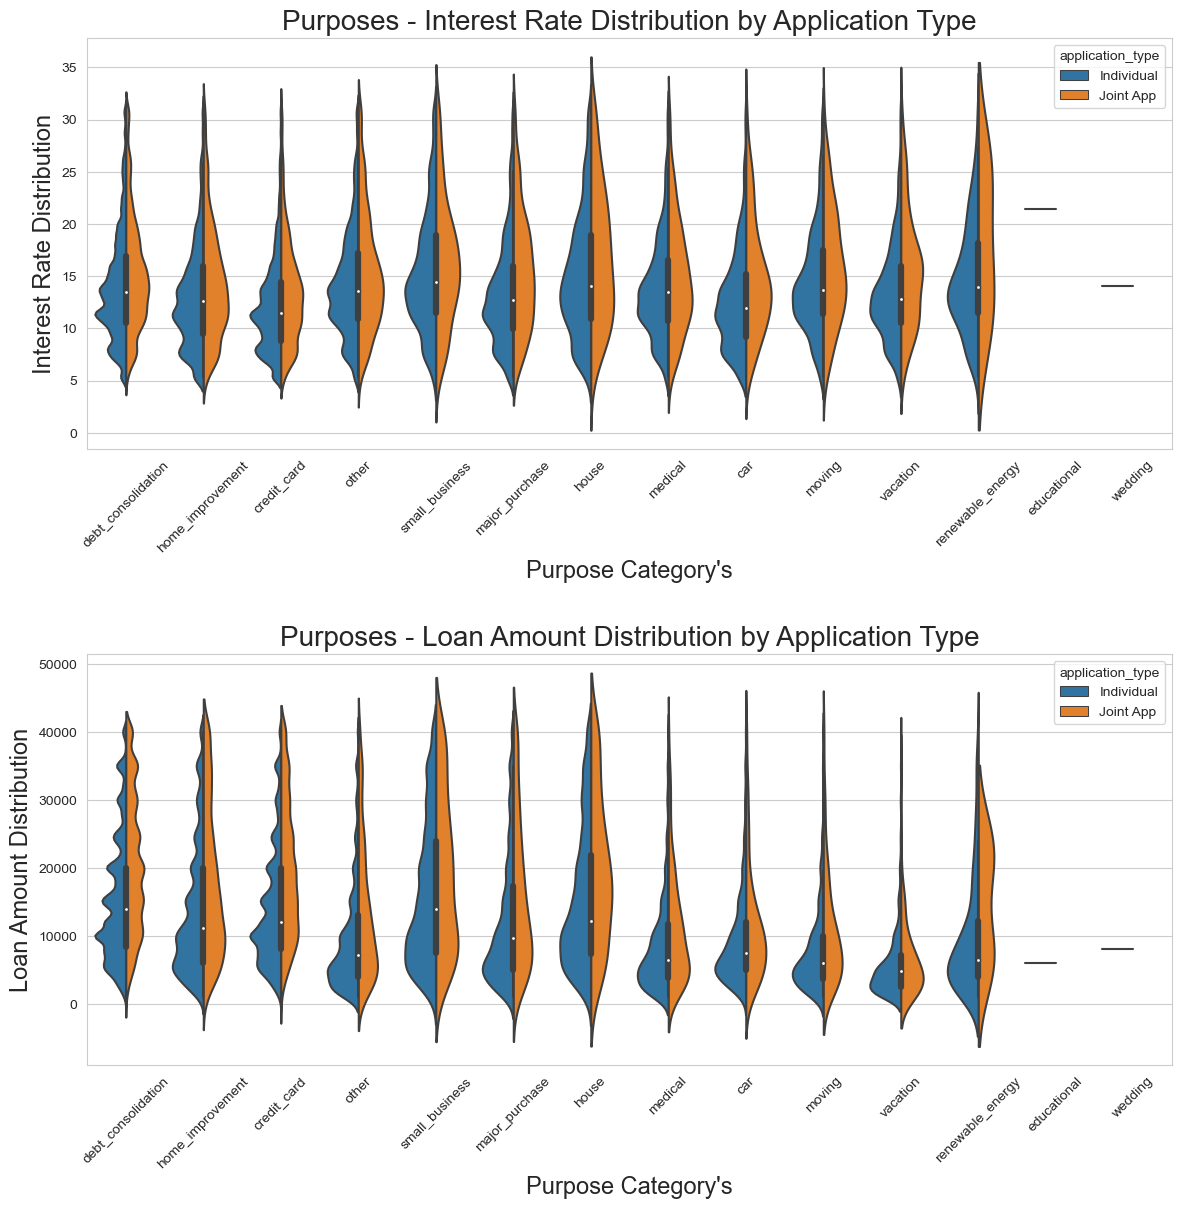

In [511]:

# Now will start exploring the Purpose variable
plt.figure(figsize = (14,13))

plt.subplot(211)
g = sns.violinplot(x="purpose",y="int_rate",data=df,
                    hue="application_type", split=True)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Purposes - Interest Rate Distribution by Application Type", fontsize=20)
g.set_xlabel("Purpose Category's", fontsize=17)
g.set_ylabel("Interest Rate Distribution", fontsize=17)

plt.subplot(212)
g1 = sns.violinplot(x="purpose",y="loan_amnt",data=df,
                    hue="application_type", split=True)
g1.set_xticklabels(g1.get_xticklabels(),rotation=45)
g1.set_title("Purposes - Loan Amount Distribution by Application Type", fontsize=20)
g1.set_xlabel("Purpose Category's", fontsize=17)
g1.set_ylabel("Loan Amount Distribution", fontsize=17)

plt.subplots_adjust(hspace = 0.5,top = 0.9)

plt.show()

In [512]:
loan_grade = ['loan_status', 'grade']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[loan_grade[0]], df[loan_grade[1]], 
                   normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,6.630000,13.690000,23.110000,31.340000,40.170000,48.290000,52.840000
Default,0.020000,0.030000,0.040000,0.050000,0.040000,0.030000,0.000000
Fully Paid,93.350000,86.280000,76.840000,68.620000,59.790000,51.680000,47.160000


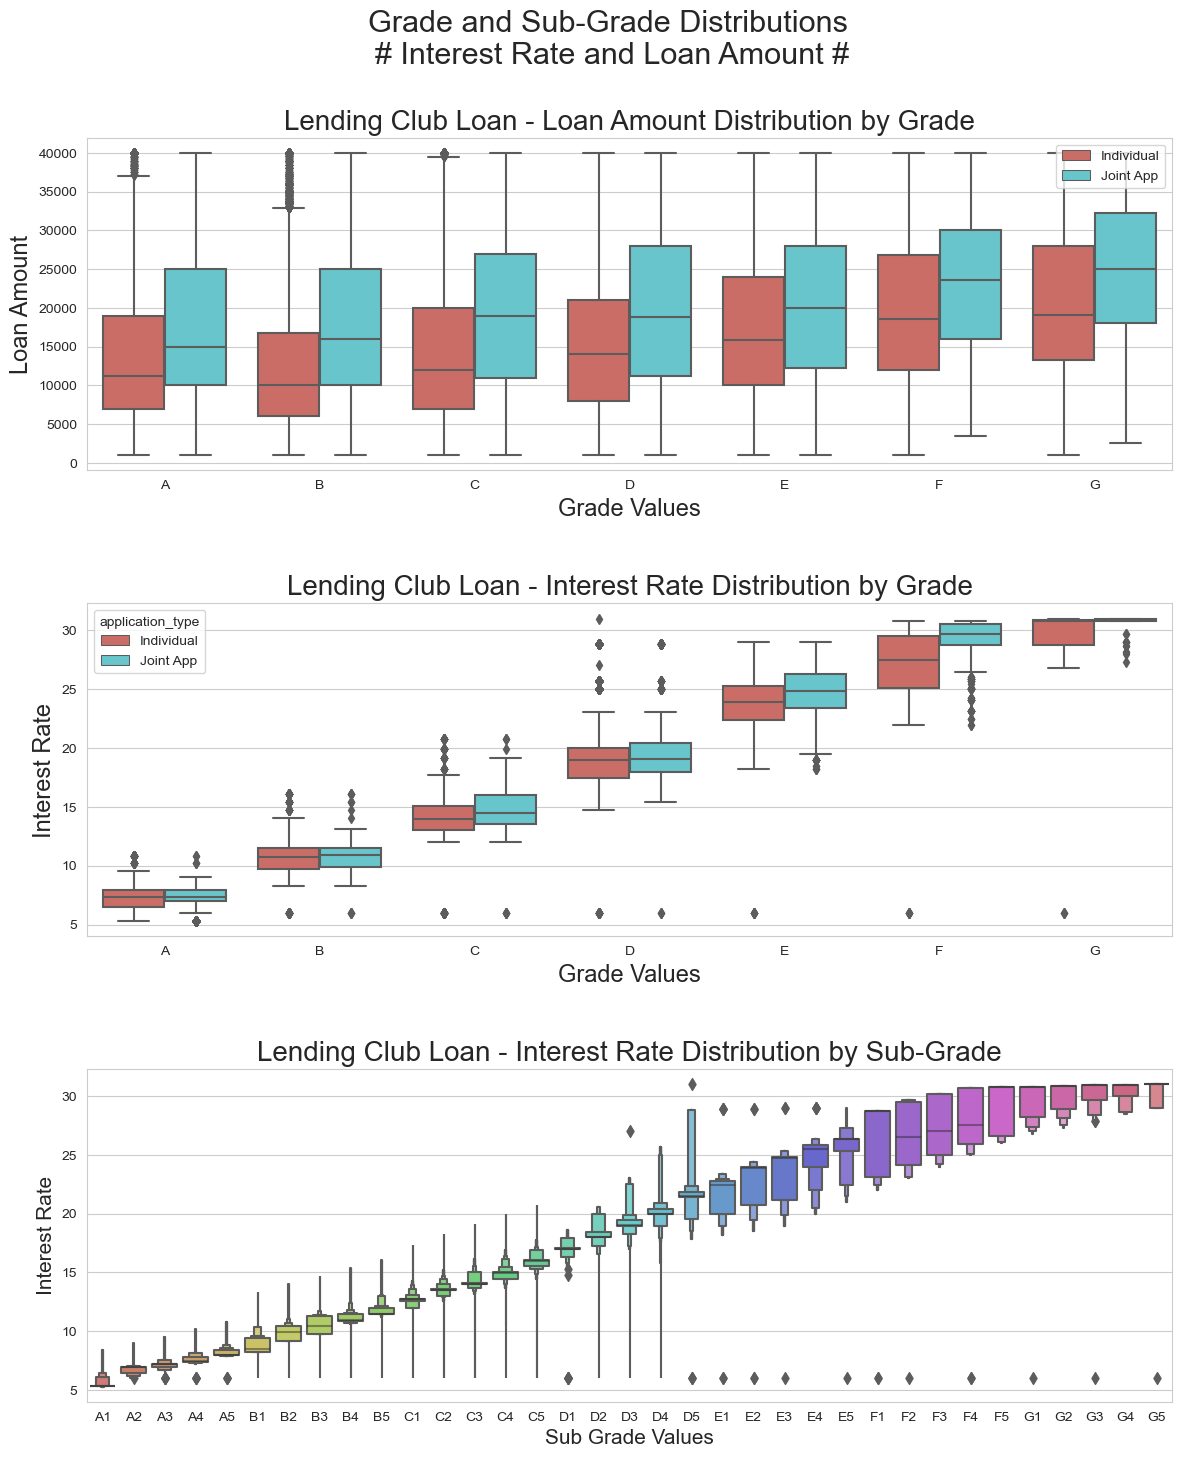

In [513]:

order_sub = df.groupby("sub_grade")['int_rate'].count().index

plt.figure(figsize=(14,16))

plt.suptitle('Grade and Sub-Grade Distributions \n# Interest Rate and Loan Amount #', fontsize=22)

plt.subplot(311)
g = sns.boxplot(x="grade", y="loan_amnt", data=df,
                palette="hls", hue="application_type", 
                order=["A",'B','C','D','E','F', 'G'])
g.set_xlabel("Grade Values", fontsize=17)
g.set_ylabel("Loan Amount", fontsize=17)
g.set_title("Lending Club Loan - Loan Amount Distribution by Grade", fontsize=20)
g.legend(loc='upper right')

plt.subplot(312)
g1 = sns.boxplot(x='grade', y="int_rate",data=df, 
               hue="application_type", palette = "hls",  
               order=["A",'B','C','D','E','F', 'G'])
g1.set_xlabel("Grade Values", fontsize=17)
g1.set_ylabel("Interest Rate", fontsize=17)
g1.set_title("Lending Club Loan - Interest Rate Distribution by Grade", fontsize=20)

plt.subplot(313)
g2 = sns.boxenplot(x="sub_grade", y="int_rate", data=df, 
                   palette="hls", order=order_sub)
g2.set_xlabel("Sub Grade Values", fontsize=15)
g2.set_ylabel("Interest Rate", fontsize=15)
g2.set_title("Lending Club Loan - Interest Rate Distribution by Sub-Grade", fontsize=20)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

In [514]:
loan_grade = ['sub_grade', 'grade']
cm = sns.light_palette("green", as_cmap=True)
round(pd.crosstab(df[loan_grade[0]], df[loan_grade[1]], 
            values=df['int_rate'], aggfunc='mean'),2).fillna(0).style.background_gradient(cmap = cm)

grade,A,B,C,D,E,F,G
sub_grade,,,,,,,
A1,5.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2,6.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A3,7.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A4,7.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A5,8.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
B1,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000
B2,0.000000,9.890000,0.000000,0.000000,0.000000,0.000000,0.000000
B3,0.000000,10.550000,0.000000,0.000000,0.000000,0.000000,0.000000
B4,0.000000,11.140000,0.000000,0.000000,0.000000,0.000000,0.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


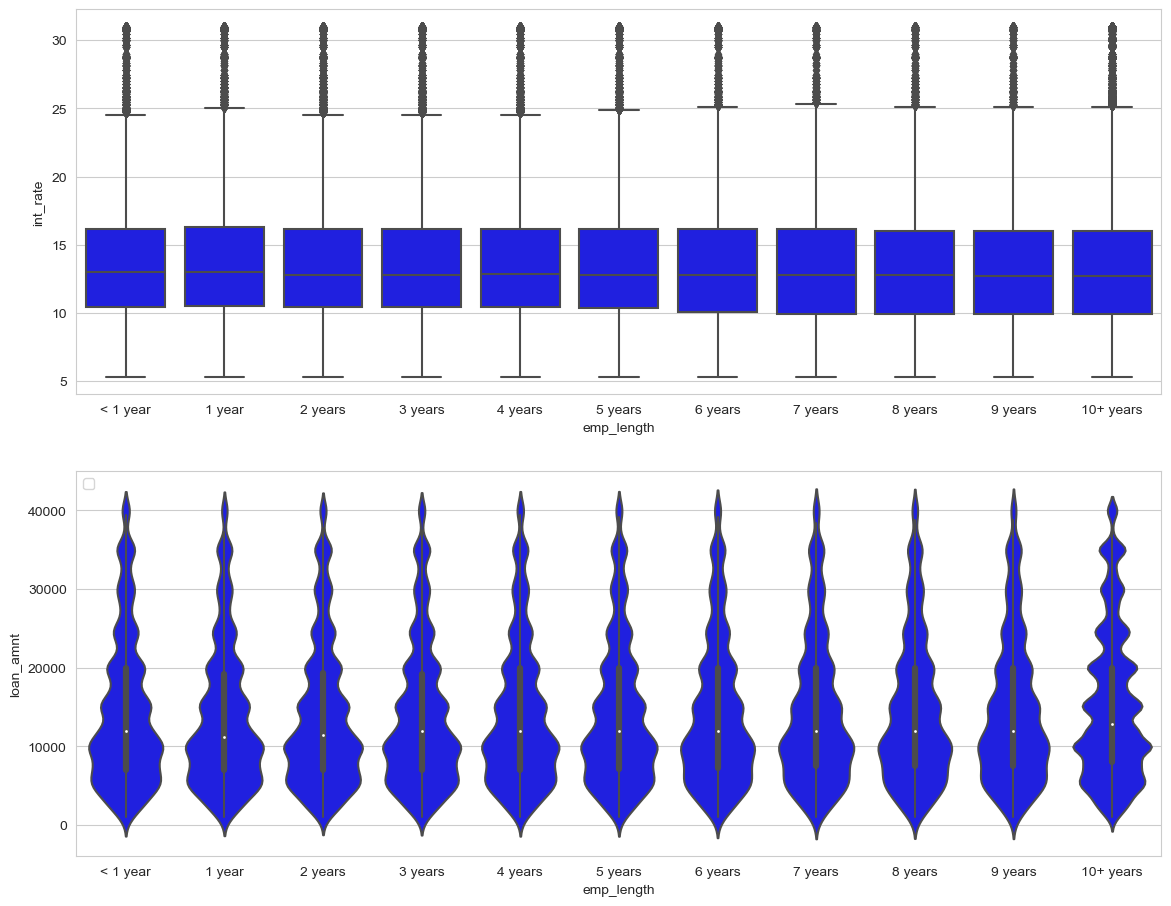

In [515]:

# emp_lenght description: 
# Employment length in years. Possible values are between 0 and 10 where 0 means 
# less than one year and 10 means ten or more years. 

emp_ord = ['< 1 year', '1 year', '2 years', '3 years',
           '4 years', '5 years', '6 years', '7 years',
           '8 years', '9 years', '10+ years']

fig, ax = plt.subplots(2,1, figsize=(14,11))
g = sns.boxplot(x="emp_length", y="int_rate", data=df,
                ax=ax[0], color='blue',
                order=emp_ord)

z = sns.violinplot(x="emp_length", y="loan_amnt",data=df, 
                   ax=ax[1], color='blue',
                   order=emp_ord)
               
plt.legend(loc='upper left')
plt.show()

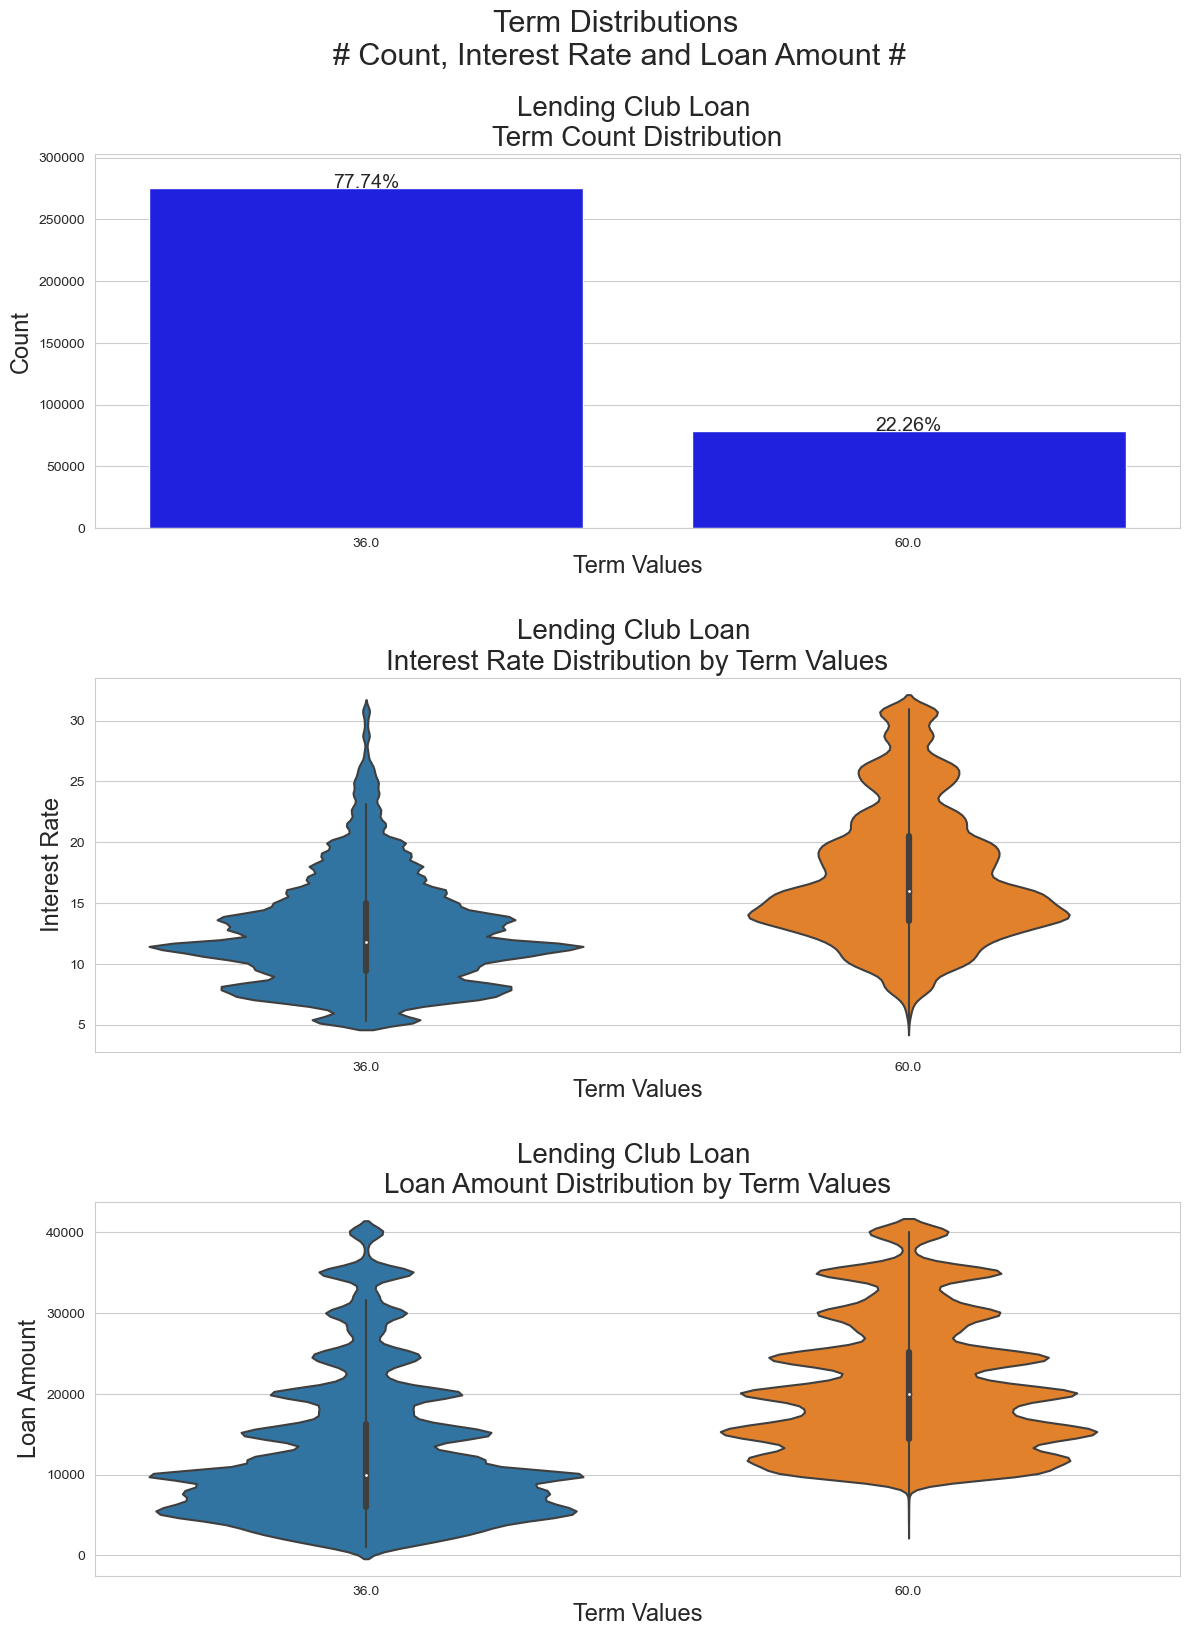

In [516]:
order_sub = df.groupby("sub_grade")['int_rate'].count().index

plt.figure(figsize=(14,18))

plt.suptitle('Term Distributions \n# Count, Interest Rate and Loan Amount #', fontsize=22)

plt.subplot(311)
g = sns.countplot(x="term", data=df,color='blue')
g.set_xlabel("Term Values", fontsize=17)
g.set_ylabel("Count", fontsize=17)
g.set_title("Lending Club Loan \nTerm Count Distribution", fontsize=20)
sizes=[]
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=14) 
g.set_ylim(0, max(sizes) * 1.10)

plt.subplot(312)
g1 = sns.violinplot(x='term', y="int_rate",data=df)
g1.set_xlabel("Term Values", fontsize=17)
g1.set_ylabel("Interest Rate", fontsize=17)
g1.set_title("Lending Club Loan \nInterest Rate Distribution by Term Values", fontsize=20)

plt.subplot(313)
g2 = sns.violinplot(x="term", y="loan_amnt", data=df)
g2.set_xlabel("Term Values", fontsize=17)
g2.set_ylabel("Loan Amount", fontsize=17)
g2.set_title("Lending Club Loan \nLoan Amount Distribution by Term Values", fontsize=20)

plt.subplots_adjust(hspace = 0.4, top = 0.9)

plt.show()

In [517]:
employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
                    '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

lst = [df]
df['emp_length_int'] = np.nan

for col in lst:
    col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
    col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
    col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
    col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
    col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
    col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
    col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
    col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
    col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
    col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
    col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
    col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

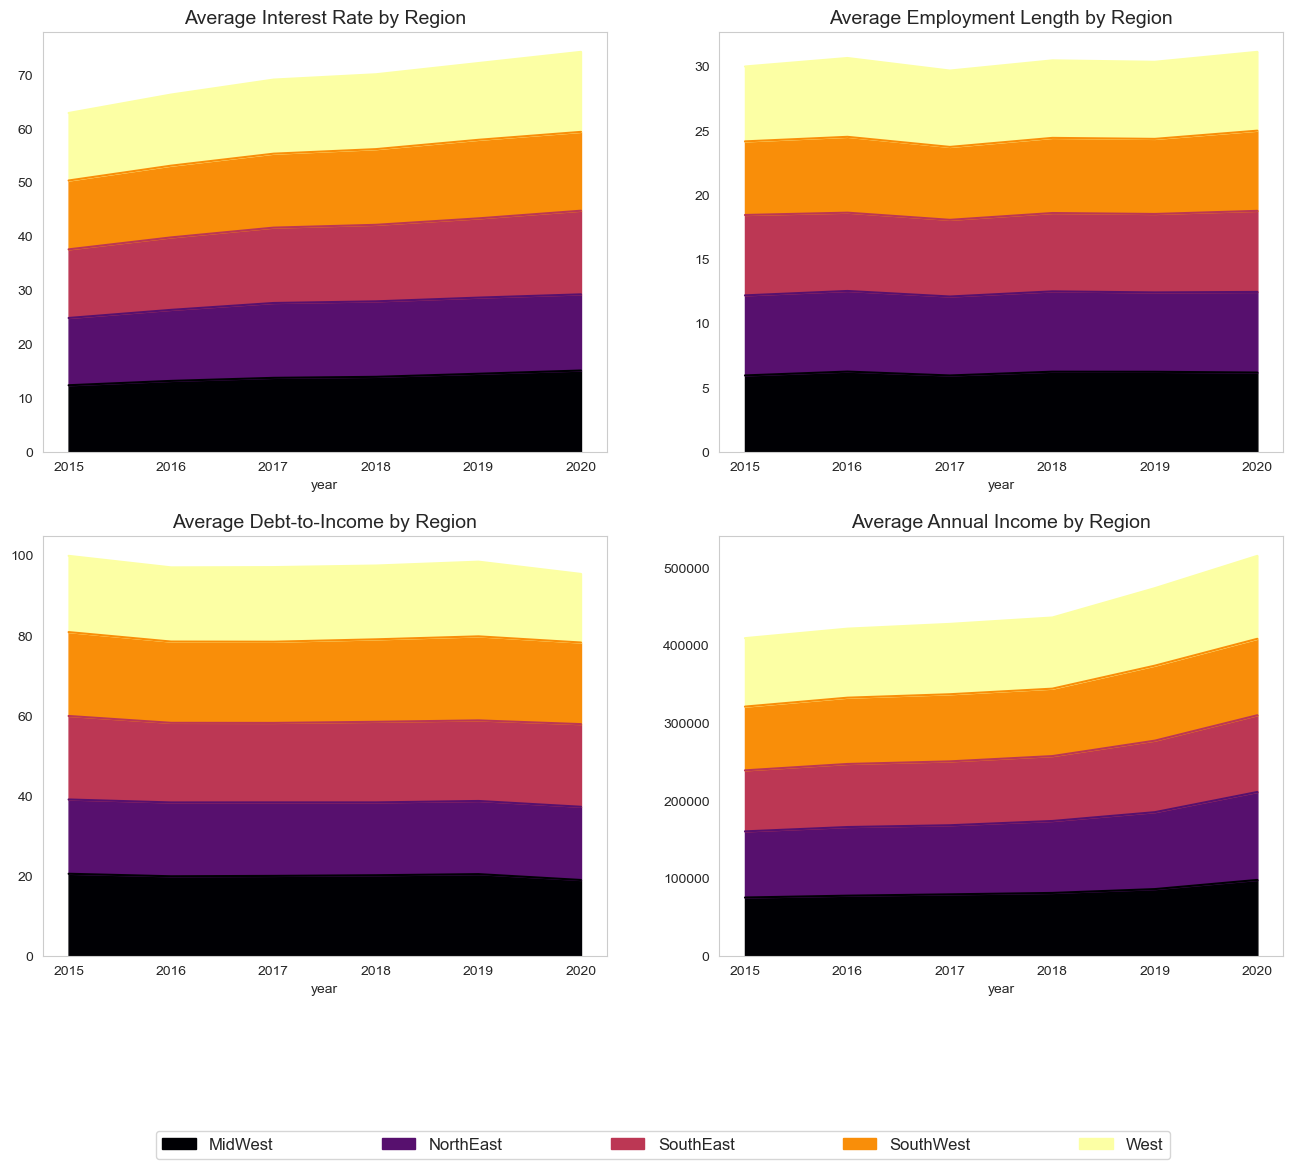

In [518]:
# Loan issued by Region and by Credit Score grade
# Change the colormap for tomorrow!

sns.set_style('whitegrid')

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
cmap = plt.cm.inferno

by_interest_rate = df.groupby(['year', 'region']).int_rate.mean()
by_interest_rate.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax1, figsize=(16,12))
ax1.set_title('Average Interest Rate by Region', fontsize=14)


by_employment_length = df.groupby(['year', 'region']).emp_length_int.mean()
by_employment_length.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax2, figsize=(16,12))
ax2.set_title('Average Employment Length by Region', fontsize=14)
# plt.xlabel('Year of Issuance', fontsize=14)

by_dti = df.groupby(['year', 'region']).dti.mean()
by_dti.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, legend=False, ax=ax3, figsize=(16,12))
ax3.set_title('Average Debt-to-Income by Region', fontsize=14)

by_income = df.groupby(['year', 'region']).annual_inc.mean()
by_income.unstack().plot(kind='area', stacked=True, colormap=cmap, grid=False, ax=ax4, figsize=(16,12))
ax4.set_title('Average Annual Income by Region', fontsize=14)
ax4.legend(bbox_to_anchor=(-1.0, -0.5, 1.8, 0.1), loc=10,prop={'size':12},
           ncol=5, mode="expand", borderaxespad=0.)

In [519]:
# Plotting by states

# Grouping by our metrics
# First Plotly Graph (We evaluate the operative side of the business)
by_loan_amount = df.groupby(['region','addr_state'], as_index=False).loan_amnt.sum()
by_interest_rate = df.groupby(['region', 'addr_state'], as_index=False).int_rate.mean()
by_income = df.groupby(['region', 'addr_state'], as_index=False).annual_inc.mean()



# Take the values to a list for visualization purposes.
states = by_loan_amount['addr_state'].values.tolist()
average_loan_amounts = by_loan_amount['loan_amnt'].values.tolist()
average_interest_rates = by_interest_rate['int_rate'].values.tolist()
average_annual_income = by_income['annual_inc'].values.tolist()


from collections import OrderedDict

# Figure Number 1 (Perspective for the Business Operations)
metrics_data = OrderedDict([('state_codes', states),
                            ('issued_loans', average_loan_amounts),
                            ('int_rate', average_interest_rates),
                            ('annual_inc', average_annual_income)])
                     

metrics_df = pd.DataFrame.from_dict(metrics_data)
metrics_df = metrics_df.round(decimals=2)
metrics_df.head()



,state_codes,issued_loans,int_rate,annual_inc
0,IL,196274700.0,13.40,86174.22
1,IN,87708075.0,13.63,76769.30
2,KS,38616725.0,13.39,76247.99
3,MI,133978650.0,13.62,80161.60
4,MN,89329725.0,13.55,79601.35


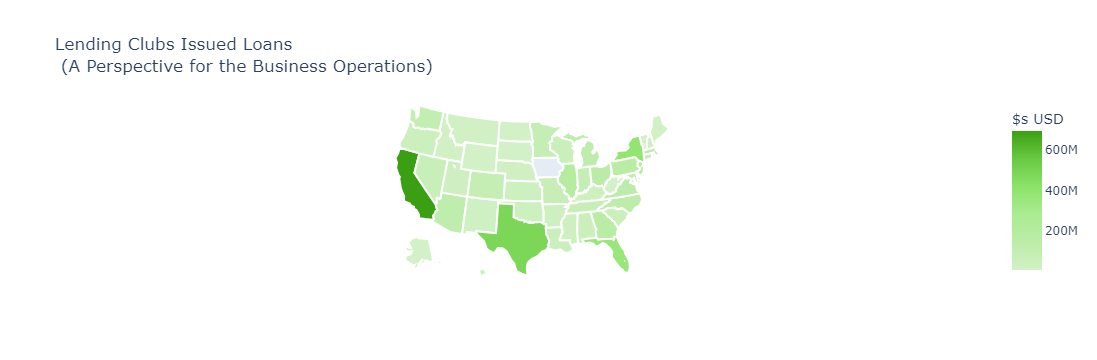

In [520]:
# Now it comes the part where we plot out plotly United States map
import chart_studio.plotly as py
import plotly.graph_objs as go


for col in metrics_df.columns:
    metrics_df[col] = metrics_df[col].astype(str)
    
scl = [[0.0, 'rgb(210, 241, 198)'],[0.2, 'rgb(188, 236, 169)'],[0.4, 'rgb(171, 235, 145)'],\
            [0.6, 'rgb(140, 227, 105)'],[0.8, 'rgb(105, 201, 67)'],[1.0, 'rgb(59, 159, 19)']]

metrics_df['text'] = metrics_df['state_codes'] + '<br>' +\
'Average loan interest rate: ' + metrics_df['int_rate'] + '<br>'+\
'Average annual income: ' + metrics_df['annual_inc'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = metrics_df['state_codes'],
        z = metrics_df['issued_loans'], 
        locationmode = 'USA-states',
        text = metrics_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "$s USD")
        ) ]


layout = dict(
    title = 'Lending Clubs Issued Loans <br> (A Perspective for the Business Operations)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

In [521]:
df['income_category'] = np.nan
lst = [df]

for col in lst:
    col.loc[col['annual_inc'] <= 100000, 'income_category'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'income_category'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'income_category'] = 'High'

<Axes: xlabel='income_category', ylabel='int_rate'>

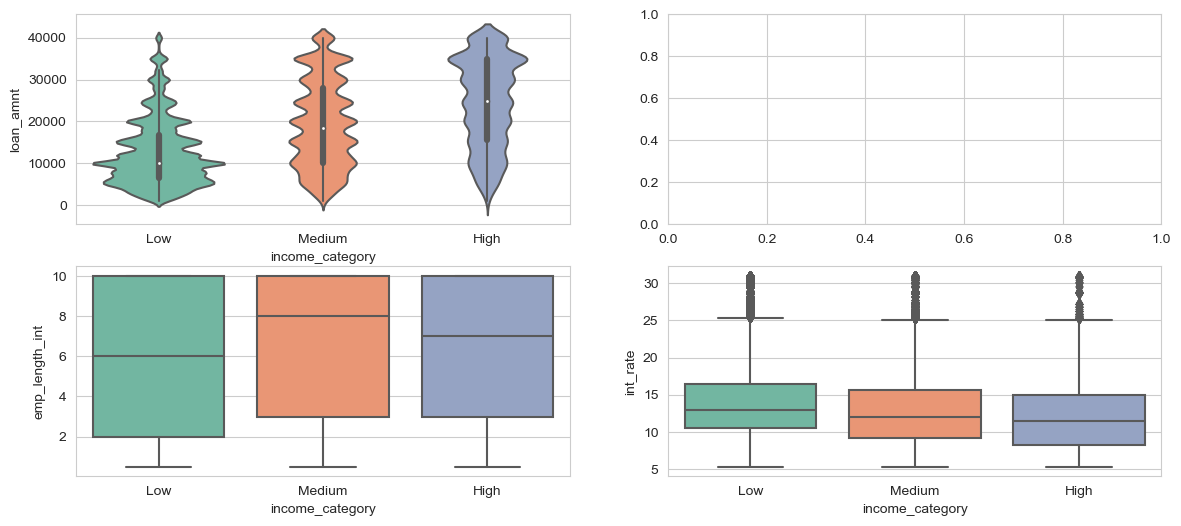

In [522]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(nrows=2, ncols=2, figsize=(14,6))

# Change the Palette types tomorrow!

sns.violinplot(x="income_category", y="loan_amnt", data=df, palette="Set2", ax=ax1 )
#sns.violinplot(x="income_category", y="loan_condition_int", data=df, palette="Set2", ax=ax2)
sns.boxplot(x="income_category", y="emp_length_int", data=df, palette="Set2", ax=ax3)
sns.boxplot(x="income_category", y="int_rate", data=df, palette="Set2", ax=ax4)

In [523]:
by_condition = df.groupby('addr_state')['loan_condition'].value_counts()/ df.groupby('addr_state')['loan_condition'].count()
by_emp_length = df.groupby(['region', 'addr_state'], as_index=False).emp_length_int.mean().sort_values(by="addr_state")

loan_condition_bystate = pd.crosstab(df['addr_state'], df['loan_condition'] )

cross_condition = pd.crosstab(df["addr_state"], df["loan_condition"])
# Percentage of condition of loan
percentage_loan_contributor = pd.crosstab(df['addr_state'], df['loan_condition']).apply(lambda x: x/x.sum() * 100)
condition_ratio = cross_condition["Bad Loan"]/cross_condition["Good Loan"]
by_dti = df.groupby(['region', 'addr_state'], as_index=False).dti.mean()
state_codes = sorted(states)


# Take to a list
default_ratio = condition_ratio.values.tolist()
average_dti = by_dti['dti'].values.tolist()
average_emp_length = by_emp_length["emp_length_int"].values.tolist()
number_of_badloans = loan_condition_bystate['Bad Loan'].values.tolist()
percentage_ofall_badloans = percentage_loan_contributor['Bad Loan'].values.tolist()


# Figure Number 2
risk_data = OrderedDict([('state_codes', state_codes),
                         ('default_ratio', default_ratio),
                         ('badloans_amount', number_of_badloans),
                         ('percentage_of_badloans', percentage_ofall_badloans),
                         ('average_dti', average_dti),
                         ('average_emp_length', average_emp_length)])


# Figure 2 Dataframe 
risk_df = pd.DataFrame.from_dict(risk_data)
risk_df = risk_df.round(decimals=3)
risk_df.head()

,state_codes,default_ratio,badloans_amount,percentage_of_badloans,average_dti,average_emp_length
0,AK,0.273,155,0.211,19.173,6.020
1,AL,0.307,1039,1.415,20.508,6.459
2,AR,0.357,728,0.991,21.072,6.316
3,AZ,0.237,1716,2.337,19.204,5.721
4,CA,0.261,9413,12.818,19.678,6.193


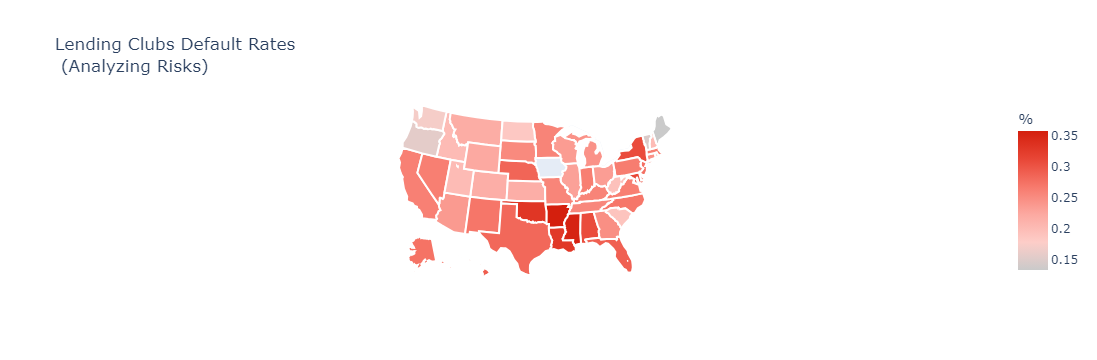

In [524]:



for col in risk_df.columns:
    risk_df[col] = risk_df[col].astype(str)
    
scl = [[0.0, 'rgb(202, 202, 202)'],[0.2, 'rgb(253, 205, 200)'],[0.4, 'rgb(252, 169, 161)'],\
            [0.6, 'rgb(247, 121, 108  )'],[0.8, 'rgb(232, 70, 54)'],[1.0, 'rgb(212, 31, 13)']]

risk_df['text'] = risk_df['state_codes'] + '<br>' +\
'Number of Bad Loans: ' + risk_df['badloans_amount'] + '<br>' + \
'Percentage of all Bad Loans: ' + risk_df['percentage_of_badloans'] + '%' +  '<br>' + \
'Average Debt-to-Income Ratio: ' + risk_df['average_dti'] + '<br>'+\
'Average Length of Employment: ' + risk_df['average_emp_length'] 


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = risk_df['state_codes'],
        z = risk_df['default_ratio'], 
        locationmode = 'USA-states',
        text = risk_df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "%")
        ) ]


layout = dict(
    title = 'Lending Clubs Default Rates <br> (Analyzing Risks)',
    geo = dict(
        scope = 'usa',
        projection=dict(type='albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)')
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='d3-cloropleth-map')

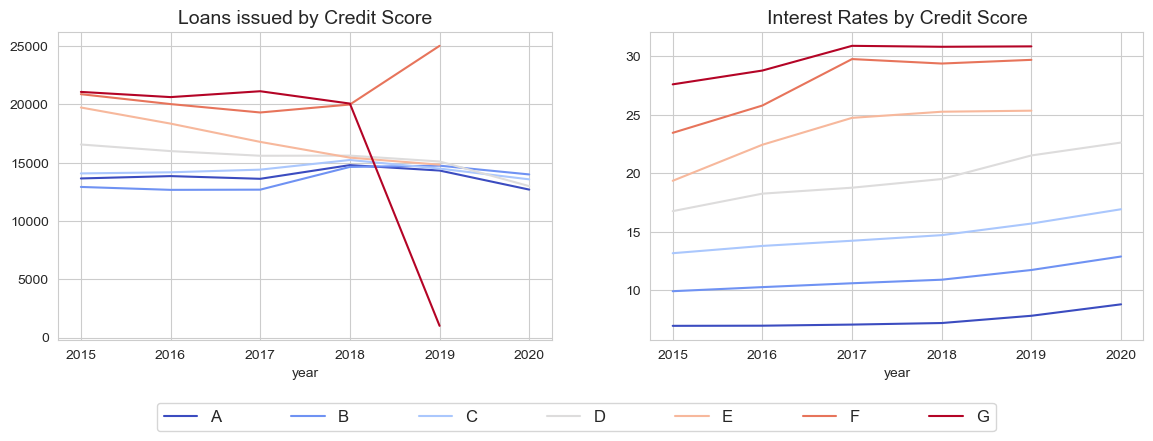

In [525]:
f, ((ax1, ax2)) = plt.subplots(1, 2)
cmap = plt.cm.coolwarm

by_credit_score = df.groupby(['year', 'grade']).loan_amnt.mean()
by_credit_score.unstack().plot(legend=False, ax=ax1, figsize=(14, 4), colormap=cmap)
ax1.set_title('Loans issued by Credit Score', fontsize=14)
    
    
by_inc = df.groupby(['year', 'grade']).int_rate.mean()
by_inc.unstack().plot(ax=ax2, figsize=(14, 4), colormap=cmap)
ax2.set_title('Interest Rates by Credit Score', fontsize=14)

ax2.legend(bbox_to_anchor=(-1.0, -0.3, 1.7, 0.1), loc=5, prop={'size':12},
           ncol=7, mode="expand", borderaxespad=0.)

In [526]:
df = df.drop(['int_round','income_category','region','loan_condition',
              'last_pymnt_d','last_credit_pull_d','emp_title', 'emp_length',
              'issue_d', 'earliest_cr_line','pymnt_plan'],axis=1)


In [527]:
df["loan_status"].value_counts()

loan_status
Fully Paid     281115
Charged Off     73303
Default           132
Name: count, dtype: int64

In [528]:
df.to_csv('loan.csv', index=False)  